In [162]:
%pylab inline
import matplotlib.pylab as plt
import numpy as np
import scipy.misc
import pickle

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [169]:
alldrop_prob = np.load('./exps/exp1/results/alldrop_prob.npy')[:,0:200,:,:]
fcdrop_prob = np.load('./exps/exp1/results/fcdrop_prob.npy')[:,0:200,:,:]
nodrop_prob = np.load('./exps/exp1/results/nodrop_prob.npy')[:,0:200,:]
img_adv = np.load('./exps/exp1/results/img_adv.npy')
tr_idx = 9
adv_idx = 9

print alldrop_prob.shape
print fcdrop_prob.shape
print nodrop_prob.shape
print img_adv.shape

(1, 200, 100, 10)
(1, 200, 100, 10)
(1, 200, 10)
(1, 1000, 100, 10)


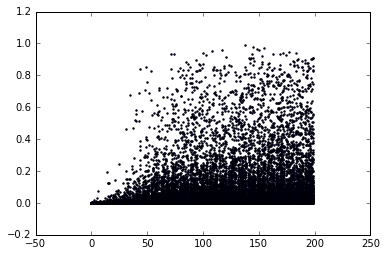

In [127]:
plt.hold(True)
img_idx = 0
#label_idx = yt_adv[img_idx] 
for i in xrange(alldrop_prob.shape[1]):
    plt.scatter(i*np.ones(alldrop_prob.shape[2]),alldrop_prob[img_idx,i,:,tr_idx],s=2)
#plt.savefig('./results/img_'+str(img_idx)+'_lab_ori.jpeg')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_adv.jpeg')

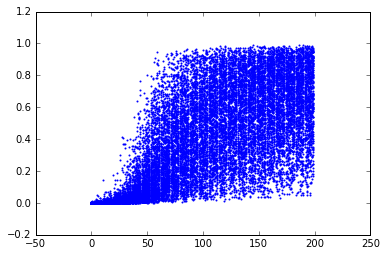

In [175]:
plt.hold(True)
img_idx = 0
#label_idx = yt_adv[img_idx] 
for i in xrange(fcdrop_prob.shape[1]):
    plt.scatter(i*np.ones(fcdrop_prob.shape[2]),fcdrop_prob[img_idx,i,:,tr_idx],s=1,color='b')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_ori.jpeg')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_adv.jpeg')

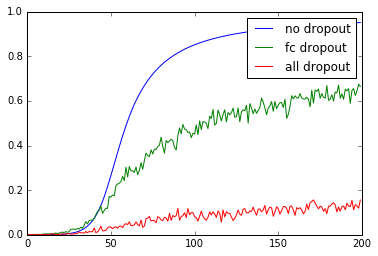

In [129]:
plt.hold(True)
img_idx = 0
fcd = [np.mean(fcdrop_prob[img_idx,i,:,tr_idx]) for i in xrange(fcdrop_prob.shape[1])]
alld = [np.mean(alldrop_prob[img_idx,i,:,tr_idx]) for i in xrange(fcdrop_prob.shape[1])]
plt.plot(nodrop_prob[img_idx,:,tr_idx], label='no dropout')
plt.plot(fcd, label='fc dropout')
plt.plot(alld, label='all dropout')
plt.legend()
#plt.savefig('./results/img_'+str(img_idx)+'_lab_ori.jpeg')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_adv.jpeg')

In [174]:
#plot images
img_adv = np.load('./exps/exp1/results/img_adv.npy')
#img_adv = np.load('./results/nn_100imgadv.npy')
img_adv = img_adv[0]

inv_P_ = np.load('./invP.npy')  #np.ones((3072,3072))
mean_ = np.load('./mean.npy')     #np.ones((3072,))

Xt = img_adv
Xt = Xt.reshape((Xt.shape[0],Xt.shape[1]*Xt.shape[2]*Xt.shape[3]))

print Xt.shape
'''
invert ZCA
'''
#self._gpu_matrix_dot(X, self.inv_P_) + self.mean_
Xt = np.dot(Xt,inv_P_) + mean_

Xt = Xt.reshape((Xt.shape[0],3,32,32))
img_adv = Xt
print img_adv.shape



grid = np.zeros((3,10*32,10*32))
print grid.shape
for i in xrange(100):
    r = i/10
    c = i%10
    r_p = np.array([x for x in xrange(r*32,(r+1)*32)])
    c_p = np.array([y for y in xrange(c*32,(c+1)*32)])
    for x,ix in zip(r_p,np.arange(32)):
        for y,iy in zip(c_p,np.arange(32)):
            grid[:,x,y] = img_adv[i,:,ix,iy]
            

scipy.misc.imsave('test2.jpg',np.rot90(grid.T,k=3))

(1000, 3072)
(1000, 3, 32, 32)
(3, 320, 320)


In [ ]:
c_prob = np.load('./results/nn_100cprob.npy')
yt_adv = np.load('./results/nn_100ytadv.npy')
yt = np.load('./results/nn_100yt.npy')
img_adv = np.load('./results/nn_100imgadv.npy')

print c_prob.shape
print yt
print yt_adv
print img_adv.shape


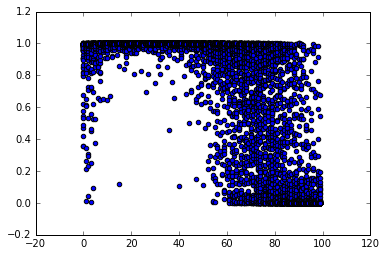

In [72]:
plt.hold(True)
img_idx = 1
label_idx = yt[img_idx] 
#label_idx = yt_adv[img_idx] 
for i in xrange(c_prob.shape[1]):
    plt.scatter(i*np.ones(c_prob.shape[2]),c_prob[img_idx,i,:,label_idx])
#plt.savefig('./results/img_'+str(img_idx)+'_lab_ori.jpeg')
#plt.savefig('./results/img_'+str(img_idx)+'_lab_adv.jpeg')
  

(15, 100, 3, 32, 32)


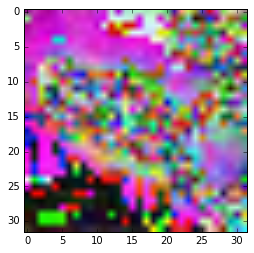

In [58]:
print img_avd.shape
plt.imshow(img_avd[img_idx,0,:,:,:].T)
scipy.misc.imsave('test.jpg',np.rot90(img_avd[img_idx,0,:,:,:].T,k=3))

(15, 100, 3, 32, 32)


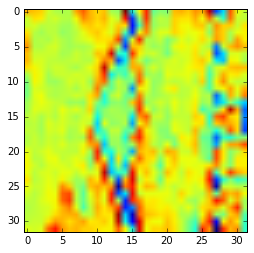

In [27]:
print img_avd.shape
plt.imshow(img_avd[img_idx,30,0,:,:].T)


In [69]:
procZCA = pickle.load(open('/Users/ambrishrawat/Downloads/preprocessor.pkl','rb'))
inv_P_ = procZCA.inv_P_    #np.ones((3072,3072))
mean_ = procZCA.mean_     #np.ones((3072,))

gstep = 5
Xt = img_adv[:,gstep,:,:,:]
print Xt.shape

Xt = Xt.reshape((Xt.shape[0],Xt.shape[1]*Xt.shape[2]*Xt.shape[3]))

print Xt.shape
'''
invert ZCA
'''
#self._gpu_matrix_dot(X, self.inv_P_) + self.mean_
Xt = np.dot(Xt,inv_P_) + mean_

Xt = Xt.reshape((Xt.shape[0],3,32,32))

indices = [1,10,100,150,42,21,75,57,37,111, 234 ,542, 356 ,653,567]
    
for i in xrange(Xt.shape[0]):
    save_img(Xt[i,:,:,:],path='images/img_'+str(gstep)+'_inv_zca',tag=str(indices[i]))
    pass

ImportError: No module named pylearn2.datasets.preprocessing